# 💳Credit Card Customer Segmentation

📌In this project, the dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In [1]:
#import libraries

import pandas as pd      #for data manipulation
import numpy as np       #for numerical operations
import matplotlib.pyplot as plt      #for data visualization
import seaborn as sns                #for data visualization
from sklearn.preprocessing import StandardScaler        # for feature standardization
from sklearn.cluster import KMeans                      # for clustering using machine learning

#load dataset
customer_data = pd.read_csv('/kaggle/input/credit-card-customer-segmentation-data/customer_segmentation.csv')


print("Data loaded successfully.")
print("Complete")

Data loaded successfully.
Complete


# EDA: Descriptive Statistics

We will start with exploring our dataset. 

Here's the data dictionary:

1. `customer_id:` unique identifier for each customer.
2. `age`: customer age in years.
3. `gender`: customer gender (M or F).
4. `dependent_count`: number of dependents of each customer.
5. `education_level`: level of education ("High School", "Graduate", etc.).
6. `marital_status`: marital status ("Single", "Married", etc.).
7. `estimated_income`: the estimated income for the customer projected by the data science team.
8. `months_on_book`: time as a customer in months.
9. `total_relationship_count`: number of times the customer contacted the company.
10. `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
11. `credit_limit`: customer's credit limit.
12. `total_trans_amount`: the overall amount of money spent on the card by the customer.
13. `total_trans_count`: the overall number of times the customer used the card.
14. `avg_utilization_ratio`: daily average utilization ratio.


In [2]:
# Check the first few rows
customer_data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


## 📚 1. Data Overview: Data Types

First, we want to understand what types of data we are dealing with.
This helps us decide how to treat each column (numerical, categorical, etc.).

In [3]:
print(customer_data.dtypes)

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object


## 📚 2. Summary of Data Types
After knowing the data types, it's important to see their counts


In [4]:
customer_data.dtypes.value_counts()

int64      9
object     3
float64    2
Name: count, dtype: int64

This shows how many columns are numerical, categorical, or other types.

This data set include:

9 columns are integers

3 columns are objects (text) This columns are: [gender],[education_level],[marital_status]

2 columns are floats

## 📚 3. General Info About Dataset
After knowing the data types, it's important to see missing data, size, types.

In [5]:
# Check general information about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

## 📚 4. Categorical Feature Analysis
Next, we check categorical columns individually to understand the distribution of their

**4.1 Marital Status**
- This shows how many customers are "Married", "Single", "Divorced", etc.

In [6]:
customer_data['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

**4.2 Gender**
- This shows the distribution between Male (M) and Female (F) customers.

In [7]:
customer_data['gender'].value_counts()

gender
F    5358
M    4769
Name: count, dtype: int64

**4.3 Education Level**
- This shows how many customers have "Graduate", "High School", "College" education, etc.

In [8]:
customer_data['education_level'].value_counts()

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

## 📚 5. Statistical Summary of Numerical Columns
- Now, let's get a statistical summary of the numerical columns.
- This shows count, mean, standard deviation, min, max, 25th, 50th, and 75th percentiles for numerical columns.

This helps detect:

- Outliers (unusually high or low values)

- Skewness in data (if the mean and median are very different)

- General range of values

- Choose relevant features for clustering

In [9]:
# Check basic statistical summary
customer_data.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


**📜Summary Insight:**

- Average customer is 46, min 26 years old.
- Average income is around $62,078. But it depends on 20k to 200k.
- Some customers have very high credit limits or very high transaction counts (average 8,6k , max 34,5k)
- Utilization ratio varies widely, which could be a strong segmentation feature:
  (The average usage rate is 0.27, meaning 27% of the card limit is used. But min use almost 0%, max use 99%)

# Data Cleaning and Preparation

## 📚 1. Null Values Check
Before modeling, we must ensure there are no missing (null) values.

In [10]:
# Check missing values
customer_data.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

## 📚 2. Visual Exploration
Once the data looks clean, we start visualizing it.

But, first;

**Drop the customer_id column:**
- customer_id is a unique identifier and won't help with segmentation — so we remove it.

/tmp/ipykernel_13/3407536050.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customer_data.drop('customer_id', axis=1).hist(ax=ax)


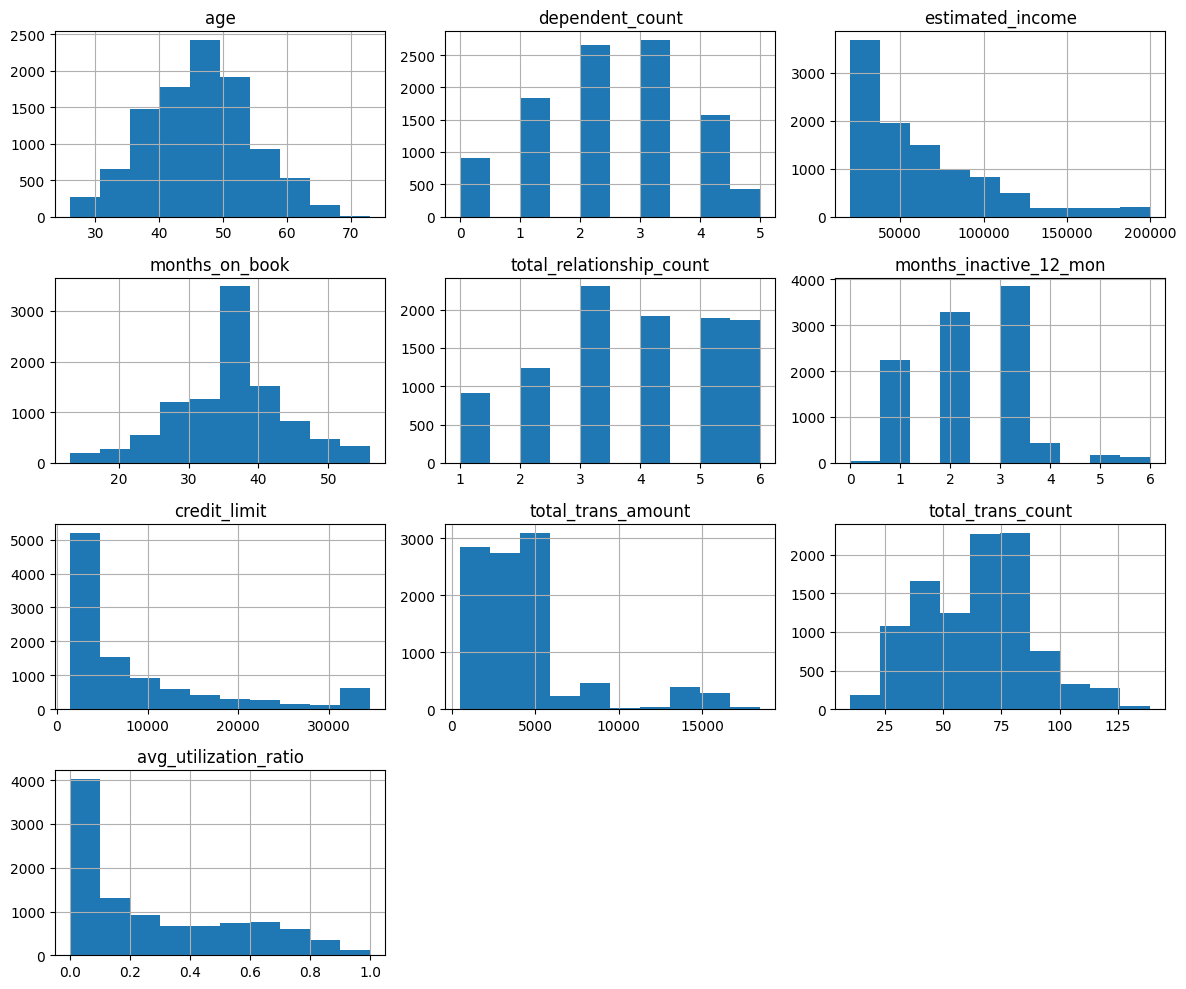

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
customer_data.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

# Correlation Analysis

## 📚1. What is Correlation Analysis?
Correlation analysis is a statistical technique used to measure and evaluate the strength and direction of relationships between two numerical variables. It helps identify which variables move together and how strongly they are connected. 

**The correlation coefficient ranges between -1 and 1:**

- +1 indicates a perfect positive correlation

- -1 indicates a perfect negative correlation

- 0 means no linear relationship

## 📚2. What Does the Heatmap Show?

The heatmap highlights only the correlations that are strong **(>|0.30|)**. This makes it easier to focus on meaningful relationships between customer attributes in the dataset.

- Y-axis represents various customer-related features like age, estimated_income, credit_limit, and transaction behavior.

- X-axis represents those same features, laid out for comparison.

- The values shown are correlation coefficients, **with darker colors and larger numbers indicating stronger relationships.**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


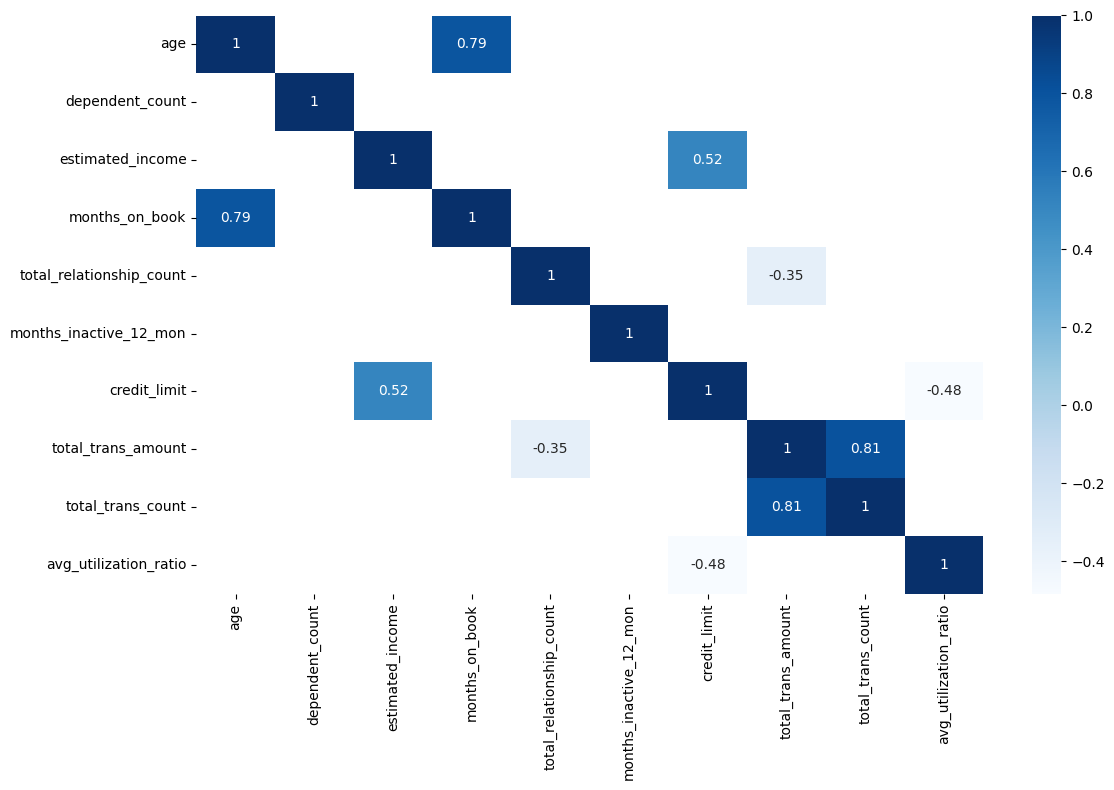

In [12]:
correlations = customer_data.drop('customer_id', axis=1).corr(numeric_only=True)  #Drop the customer_id column

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

## 📚3. Key Insights from the Correlation Heatmap

**months_on_book** vs. **age** → 0.79

- This shows a strong positive correlation, meaning older customers tend to have been with the company longer. This is expected and logical.

**credit_limit** vs. **estimated_income** → 0.52

- A moderate positive correlation suggests that customers with higher estimated incomes often have higher credit limits.

**total_trans_count** vs. **total_trans_amount** → 0.81

- A strong positive correlation, indicating that the more frequently customers use their card, the more they tend to spend overall.

**avg_utilization_ratio** vs. **credit_limit** → -0.48

- A moderate negative correlation, meaning customers with higher credit limits tend to have lower utilization ratios, possibly indicating better credit behavior or lower dependence on credit.

**total_trans_amount** vs. **total_relationship_count** → -0.35

- A slightly negative correlation, which might suggest that more interactions with the company do not necessarily lead to higher spending, or could reflect dissatisfaction or complex needs.

# Feature Engineering
- Converting categorical data into numerical data.

‼️But before we do the modifications, it's important to create a copy of the original DataFrame. We'll make all the modifications in the copy and leave the original DataFrame untouched so we can use it to analyze the results later.

## 📚 1. Gender Conversion - Binary Encoding
- It is converted to binary as Male: 1, Female: 0.

In [13]:
#Gender conversion
customers_modif = customer_data.copy()   #create a copy of the original customer_data.

#Replace the values in the gender column with 1 for "M" and 0 for "F".
#use the a lambda function with apply().
customers_modif['gender'] = customer_data['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


## 📚 2. Education Level Conversion - Label Encoding
- Education levels are converted to numerical values ​​(ordinal categorical data).

In [14]:
#education level conversion
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2, 
                     'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}

#Replace the values in the education_level column use the map() methods. 
customers_modif['education_level'] = customers_modif['education_level'].map(education_mapping)

customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


## 📚 3. Marital Status Conversion: One-Hot Encoding
- As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example.
- We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from this column.

**‼️Note:**
- If dummy variables can be created over each other, this situation causes a high correlation between the relevant variables. As a result, a measurement problem arises. For this reason, when creating a dummy variable, the first class is dropped to eliminate the situation of being created over each other.

- In summary, if a categorical variable is passed through a one-hot encoder, the first class must be dropped and the process must continue accordingly. So, drop the original marital_status column!



In [15]:
# One-hot encoding

#Use the pandas.get_dummies() function to create a dataframe containing dummy variables for the unique values in the marital_status.

dummies = pd.get_dummies(customers_modif[['marital_status']]) #testing without , drop_first=True

#Combine the new DataFrame with the original.
customers_modif = pd.concat([customers_modif, dummies], axis=1)

#Drop the original marital_status column.
customers_modif.drop(['marital_status'], axis=1, inplace=True)      

print(customers_modif.info())
customers_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_status_Divorced   10127 non-null  bool   
 14  marita

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,False,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,False,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,False,True,False,False


- With one-hot encoding, the marital status column was separated into **Divorce**, **Married**, **Single** and **Unknown**.

- Total number of columns is 17.

This data set include:

* 11 columns are integers

* 4 columns are boolean

* 2 columns are floats

# Scaling the Data

**Note:**
- That we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

- At this point of the project we need to transform the data so it's all on the same scale.

In [16]:
#Create a new DataFrame without the column customer_id.
X = customers_modif.drop('customer_id', axis=1) 

#Instantiate an object from the scikit-learn's StandardScaler() class and fit the new DataFrame.
scaler = StandardScaler()        
scaler.fit(X)

#Use the transform method to scale the data. Assign it to a different variable and print it.
X_scaled = scaler.transform(X)          

#As the outcome of the scaler is an array, we can transform it back to a DataFrame using pd.DataFrame().
X = pd.DataFrame(X_scaled)
X_scaled

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

# Choosing K and Clustering 

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

## 📚 1. Create an empty list to store the inertia from every model

In [17]:
#Create an empty list to store the inertia from every model.
inertias = []

## 📚 2. Loop for Different Values of K

In [18]:
#Use a for loop to the following process for different numbers of K. 
#Loop in a range from 1 to 10, for example.

for k in range(1, 11):
    model = KMeans(n_clusters=k)         #Instantiate a Kmeans object setting n_clusters=k.
    y = model.fit_predict(X)             #Use fit_predict() to create clusters.
    inertias.append(model.inertia_)      #Append the inertia_ attribute of the model to the empty list.
y

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

array([2, 1, 2, ..., 8, 7, 8], dtype=int32)

## 📚 3. Plotting the Elbow Curve

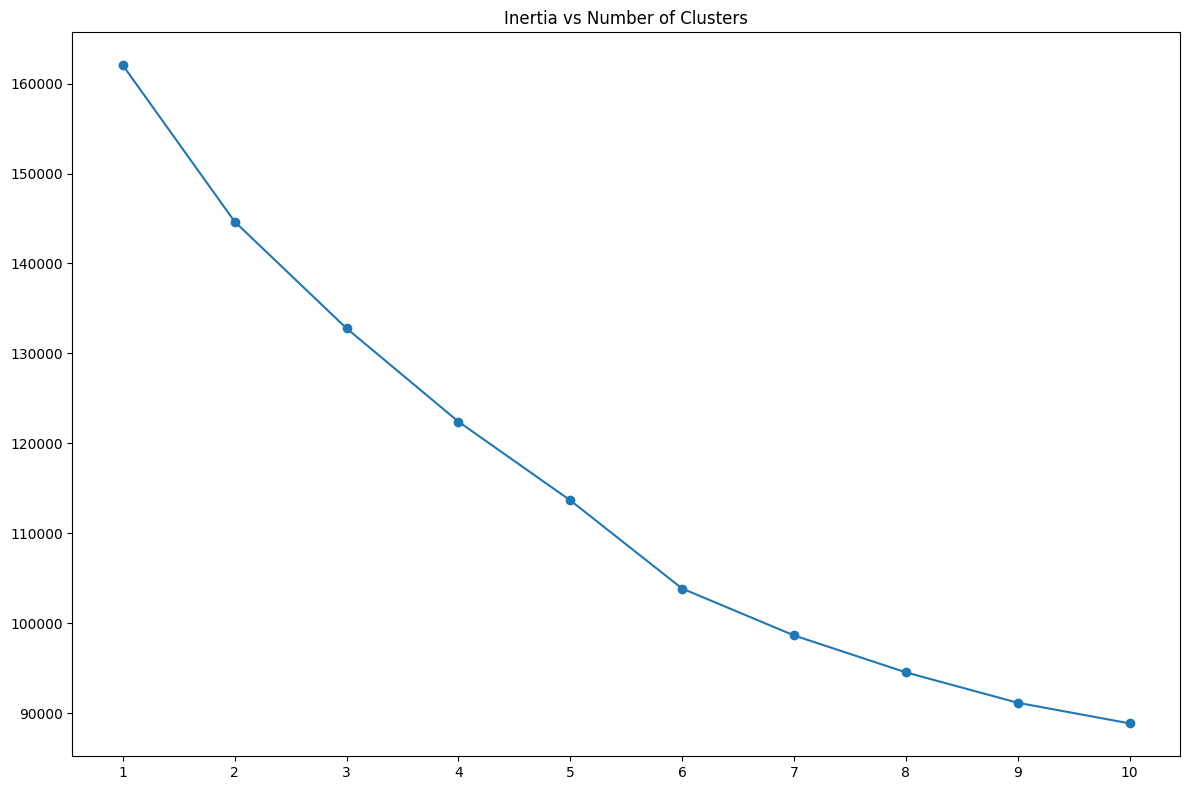

In [19]:
#Use the list to plot the elbow curve.
#Identify the "elbow point" where inertia reduction slows down.
#This helps select the optimal number of clusters (K).

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')    
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

The Elbow Curve shows a sharp decline in inertia as the number of clusters increases from 1 to 4, indicating a significant gain in cluster compactness. After K = 5, the reduction in inertia slows down considerably, forming a visible “elbow” in the curve.

Therefore, K = 5 appears to be the optimal number of clusters, balancing model complexity and within-cluster similarity.
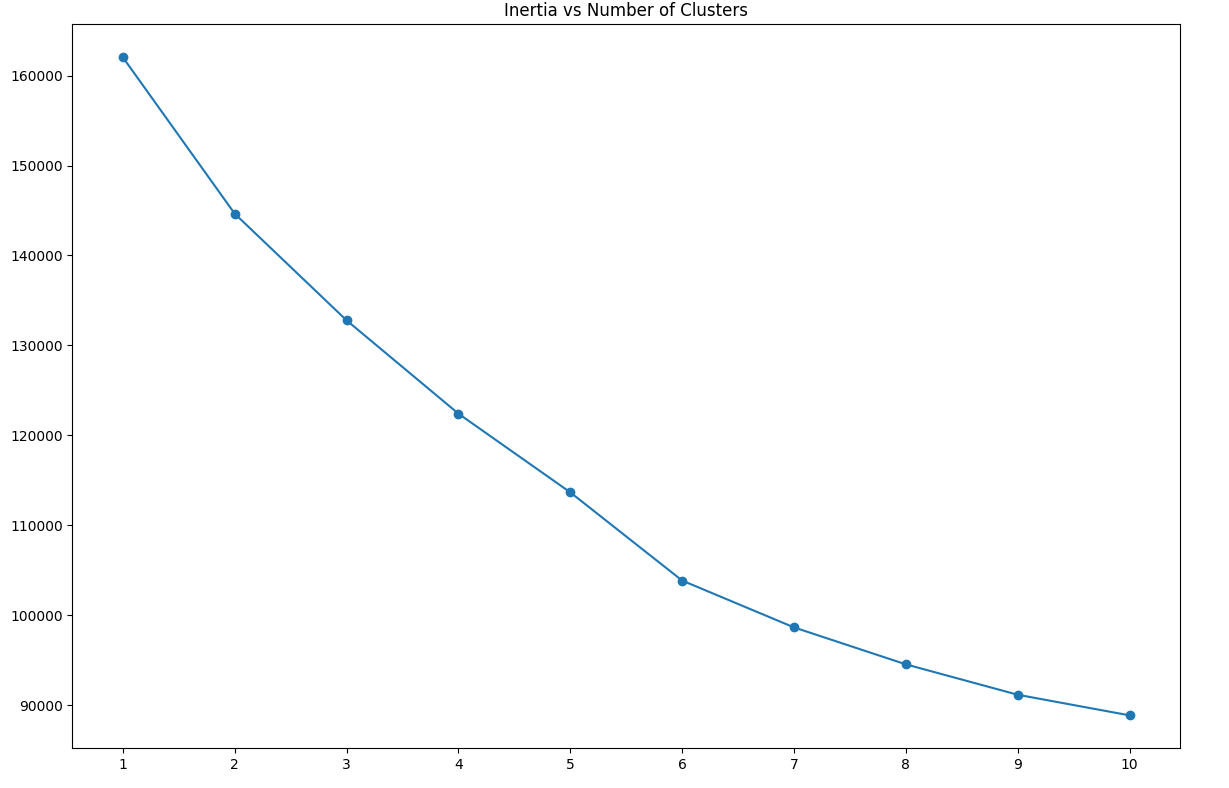

## 📚 4. Final KMeans Clustering

In [20]:
#Instantiate a new Kmeans object, but this time use the decided number of clusters as K. For example: K=5

model = KMeans(n_clusters=5, random_state=42)        # Run KMeans with a fixed random_state     
y = model.fit_predict(X_scaled)         #fit_predict the data and print the outcome.

y

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, ..., 1, 3, 1], dtype=int32)

### Why use random_state=42?

- random_state=42 is used to ensure reproducibility of clustering results.
- The number 42 is a cultural reference from **The Hitchhiker’s Guide to the Galaxy**, where it is humorously described as the "answer to life, the universe, and everything."

- While any integer could be used, 42 has become a convention in the data science community.

 ## 📚 5. Add Cluster Labels to Data

In [21]:
#Add the cluster labels to the original dataset.
customer_data['CLUSTER'] = y + 1       #We add +1 because cluster numbering usually starts at 0.
customer_data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,2
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,2
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,4
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


 ## 📚 6. Cluster Distribution

In [22]:
#Check how many customers are assigned to each cluster.

customer_data['CLUSTER'].value_counts()

CLUSTER
2    3719
3    3146
1    1767
4     748
5     747
Name: count, dtype: int64

- This shows an imbalanced but acceptable segmentation.

 ## 📚 7. Plot Numerical Features per Cluster

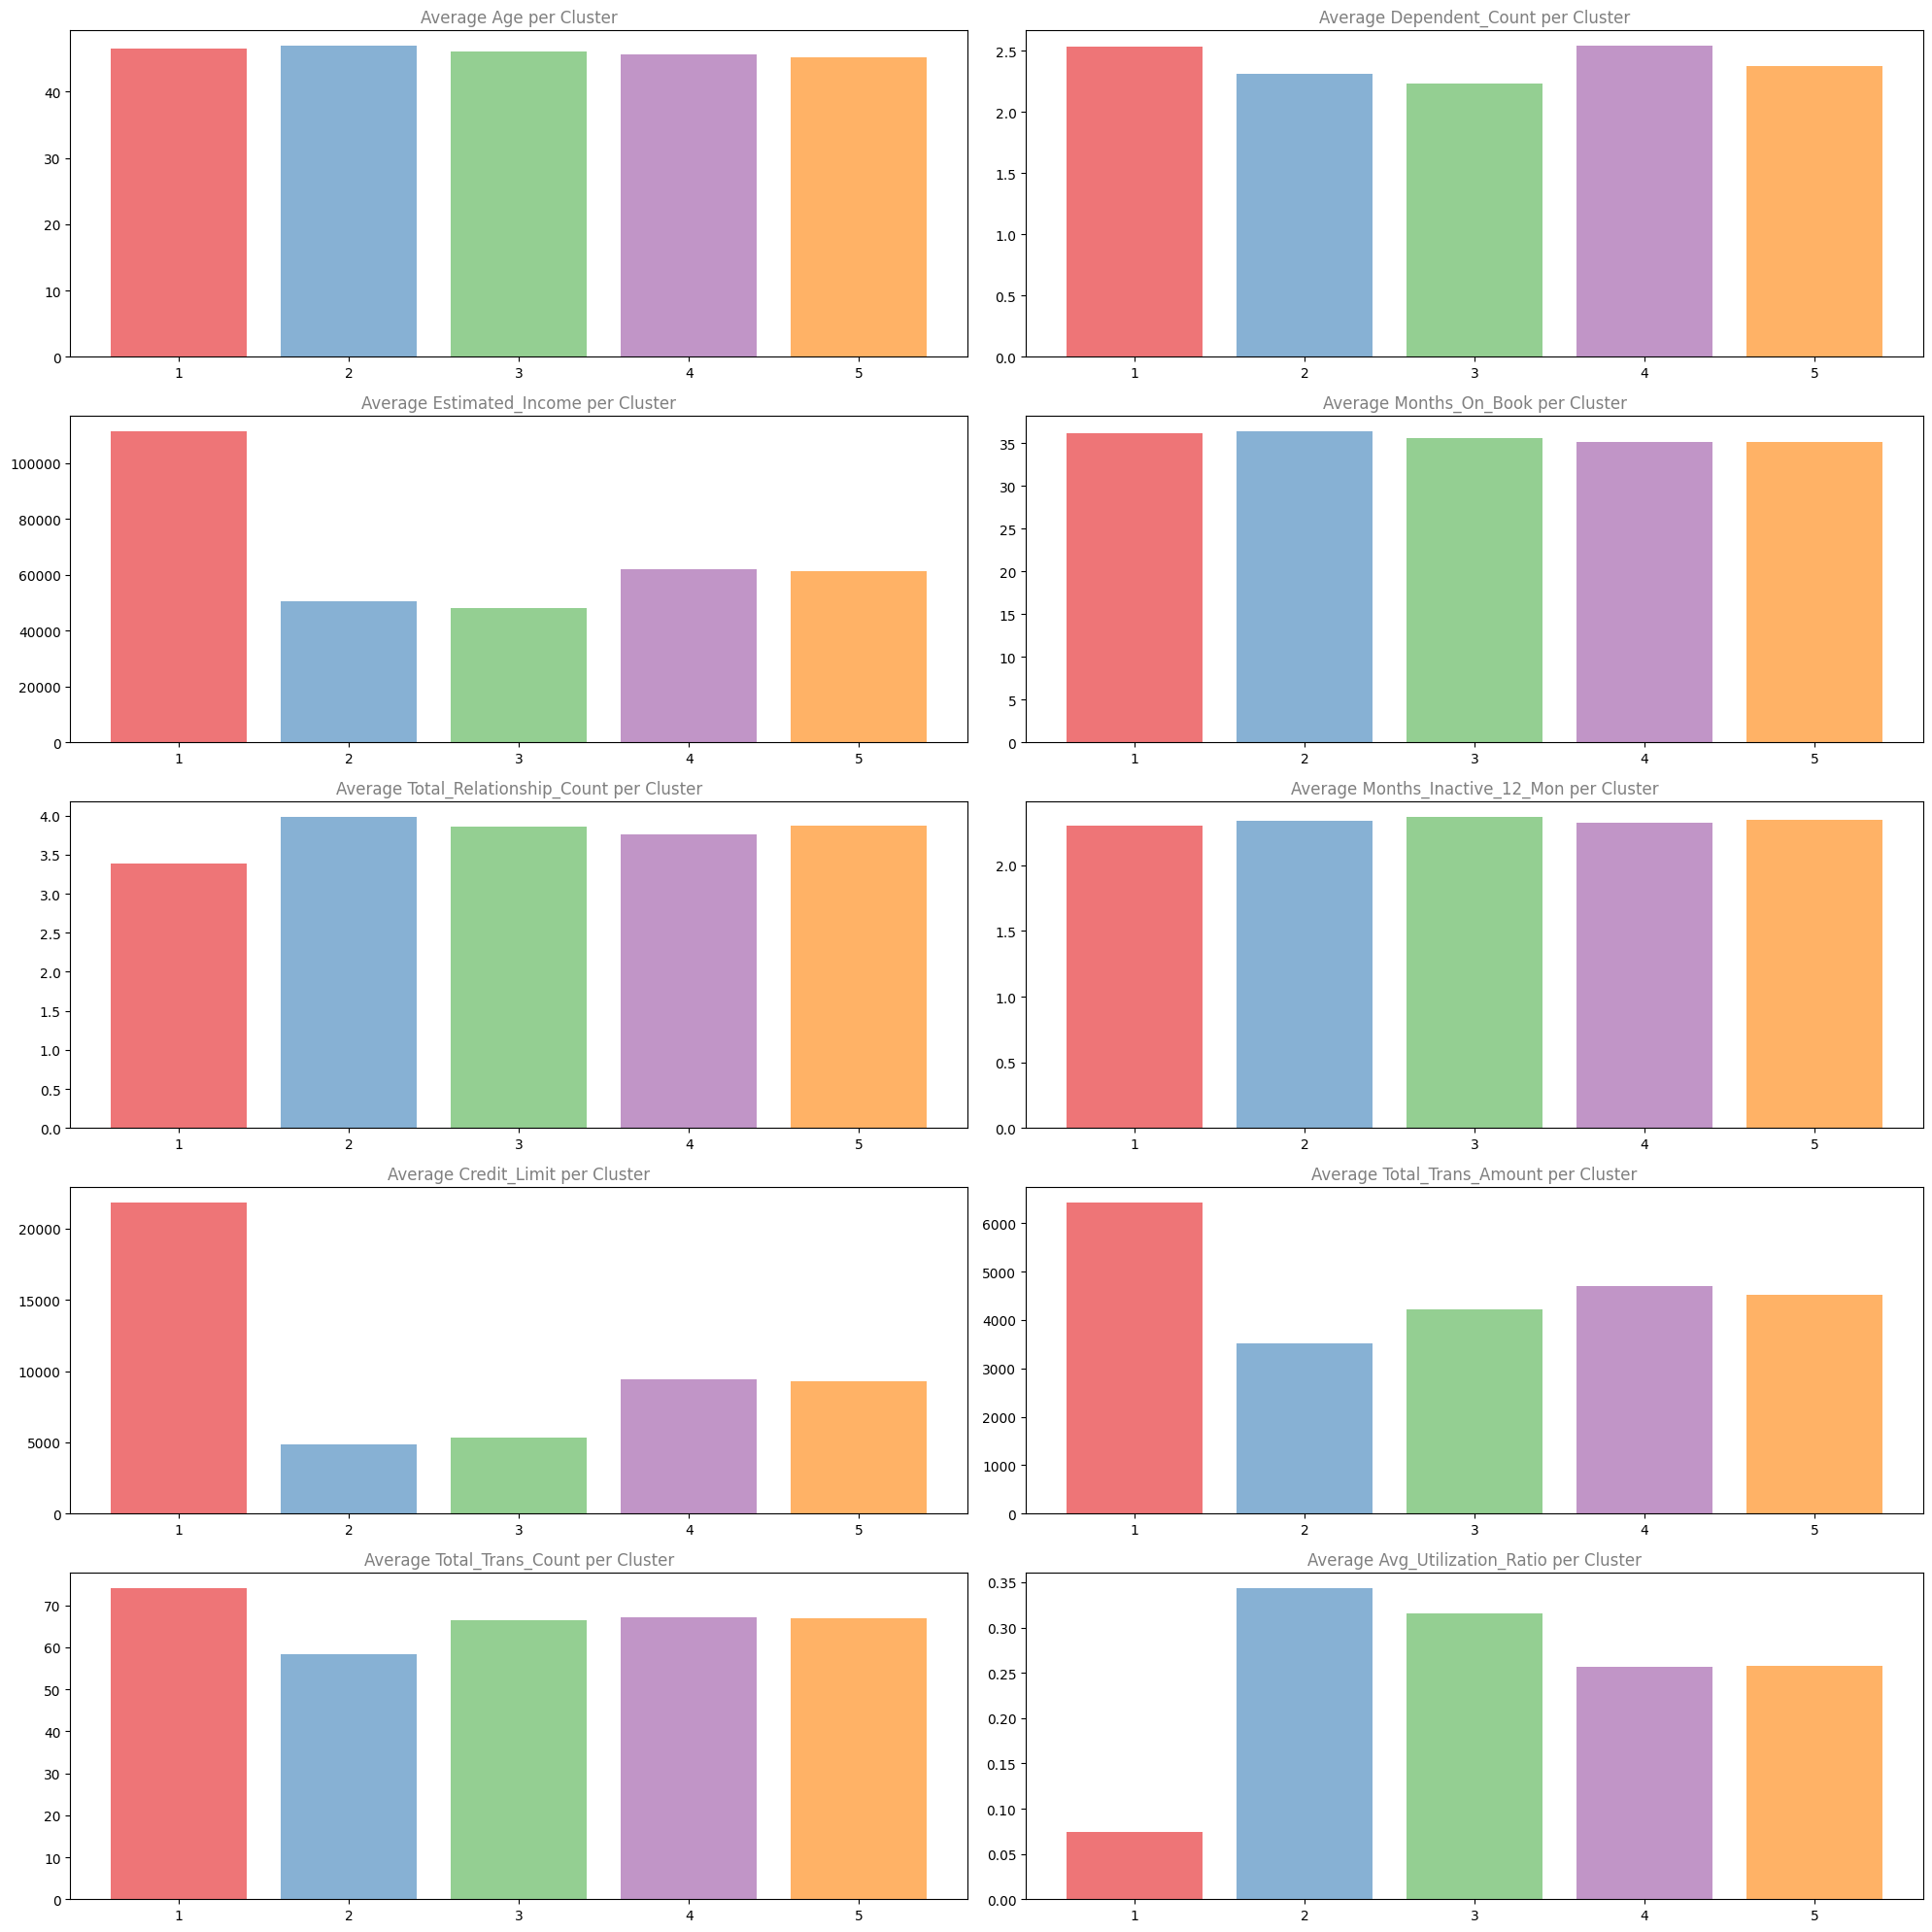

In [23]:
#Plot bar charts showing the average value of each numerical feature for each cluster.

numeric_columns = customer_data.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    customer_data_plot = customer_data.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(customer_data_plot.index, customer_data_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

 ## 📚 8. Scatterplots to Visualize Clusters (Selected Variables)

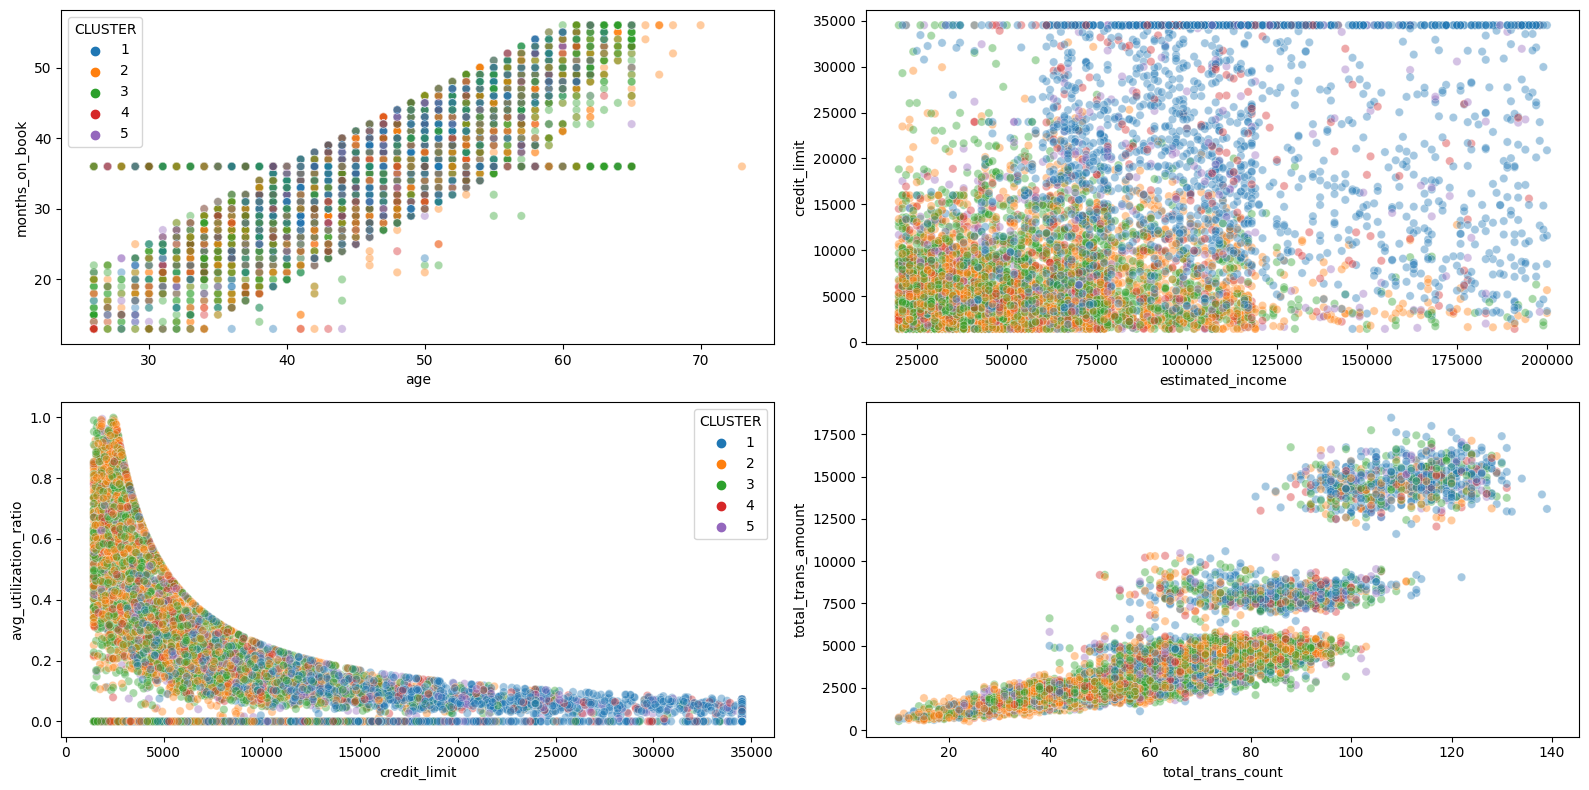

In [24]:
#Create 4 scatterplots to visualize how clusters are distributed based on key feature pairs.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customer_data, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customer_data, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customer_data, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customer_data, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

### Scatterplot Analysis:

These scatterplots provide a visual distribution of customer clusters based on key feature pairs:

**Age vs. Months on Book (Top-Left)**:
- All clusters show a similar spread in terms of age and account duration, indicating that these two features are not strong differentiators among groups.

**Estimated Income vs. Credit Limit (Top-Right)**:
- There is a clear positive correlation between income and credit limit. Higher-income clusters tend to have significantly higher credit limits, helping to distinguish affluent customer segments.

**Credit Limit vs. Avg. Utilization Ratio (Bottom-Left)**:
- Some clusters show high credit limits with low utilization ratios, indicating potential for promoting financial products. Others with lower limits tend to use a higher portion of their credit.

**Total Transaction Count vs. Total Transaction Amount (Bottom-Right)**:
- Clusters differ in transaction behavior—some show high frequency with moderate spending, while others spend large amounts with fewer transactions, highlighting different spending patterns.

These visualizations support cluster profiling by highlighting the distinct behaviors and characteristics within each segment.

 ## 📚 9. Plot Categorical Variables by Cluster

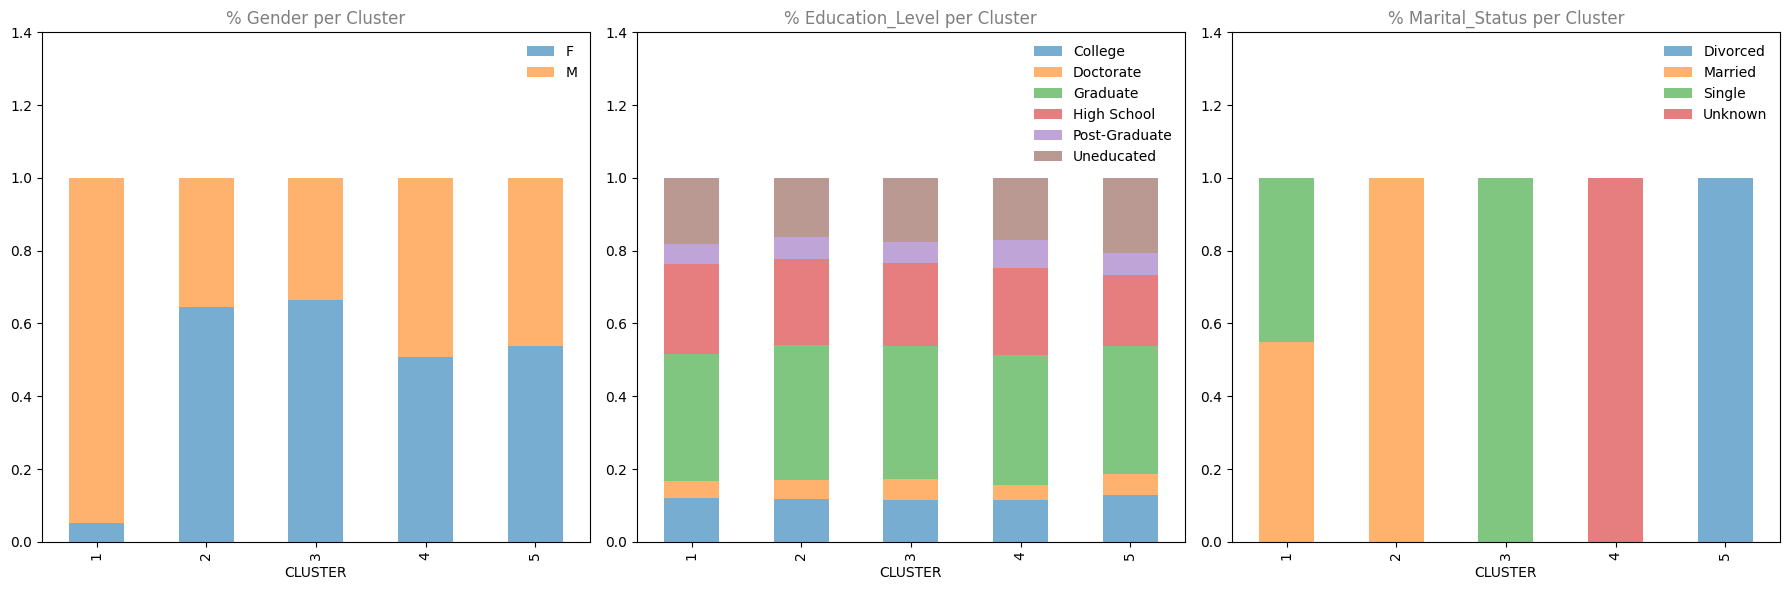

In [25]:
#Plot stacked bar charts to show the distribution of categorical variables like gender, education_level, and marital_status by cluster.

cat_columns = customer_data.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_customer_data = pd.crosstab(index=customer_data['CLUSTER'], columns=customer_data[col], values=customer_data[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_customer_data.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    # ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

### Categorical Variable Distribution by Cluster:
These stacked bar charts illustrate how categorical variables — gender, education level, and marital status — are distributed across the identified customer clusters:

**Gender:**

- Cluster 1 shows a male-dominant profile.

- Clusters 2 and 3 have a female-majority composition.

- Clusters 4 and 5 present a balanced gender distribution, indicating no strong gender skew.

**Education Level:**

- Across all clusters, the distribution of education levels appears relatively **balanced**, with no single educational background overwhelmingly dominating a specific cluster.

**Marital Status:**

- Cluster 1 includes a balanced **mix of married and single** individuals.

- Cluster 2 is composed **entirely of married** customers.

- Cluster 3 consists **entirely of single** customers.

- Cluster 4 has **unknown marital status** for all individuals.

- Cluster 5 includes only **divorced** individuals.
  
These demographic insights provide a more nuanced understanding of each cluster's composition, helping tailor strategies for customer engagement, product offerings, and communication. 

# Cluster Profiling-Final Result and Insights 

 ## 📚 1. Numeric Column Insights (Means per Cluster)

In [26]:
# Numeric columns (excluding customer_id and cluster)
numeric_columns = customer_data.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

# Group by CLUSTER and calculate mean
cluster_numeric_summary = customer_data.groupby('CLUSTER')[numeric_columns].mean().round(2)

cluster_numeric_summary

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
CLUSTER,,,,,,,,,,
1,46.55,2.54,111267.69,36.17,3.39,2.30,21817.14,6420.38,74.03,0.07
2,46.90,2.31,50680.56,36.36,3.98,2.34,4860.44,3516.91,58.31,0.34
3,46.00,2.23,48130.96,35.65,3.85,2.37,5334.48,4219.76,66.43,0.32
4,45.56,2.54,61937.17,35.18,3.76,2.32,9413.05,4706.94,67.11,0.26
5,45.12,2.37,61346.72,35.15,3.87,2.35,9324.89,4524.53,66.88,0.26


 ## 📚 2. Categorical Column Insights (Distribution % per Cluster)

In [27]:
# Categorical columns
categorical_columns = customer_data.select_dtypes(include=['object']).columns

# Loop to print distribution per cluster
for col in categorical_columns:
    cluster_categorical_summary = pd.crosstab(customer_data['CLUSTER'], customer_data[col], normalize='index') * 100
    print(f"Distribution of {col} per Cluster:")
    print(cluster_categorical_summary.round(2))
    print("\n" + "-"*50 + "\n")

Distribution of gender per Cluster:
gender       F      M
CLUSTER              
1         5.15  94.85
2        64.45  35.55
3        66.37  33.63
4        50.80  49.20
5        53.82  46.18

--------------------------------------------------

Distribution of education_level per Cluster:
education_level  College  Doctorate  Graduate  High School  Post-Graduate  \
CLUSTER                                                                     
1                  12.11       4.47     35.03        24.62           5.55   
2                  11.64       5.30     37.13        23.61           6.16   
3                  11.57       5.63     36.71        22.70           5.88   
4                  11.36       4.14     35.70        23.93           7.89   
5                  12.85       5.89     35.21        19.41           6.02   

education_level  Uneducated  
CLUSTER                      
1                     18.22  
2                     16.16  
3                     17.51  
4                     

 ## 📚 3. Final Cluster Insight

'The average age across all clusters is very similar, ranging approximately between 45 and 47 years.'

### Cluster 1: "Mixed Marital Status, High Income, Male-Dominant"

- There is an average income of **$111,268**.

- There is a high average credit limit of **$21,817**.

- There is a very low utilization rate of **7%**

- There is a total average transaction amount of **$6,420**.

- There are **95% male** customers.

- There is a marital status distribution of **55% Married** and **45% Single**.

- There is a dominant education level of **35% Graduate**, **25% High School**, and **18% Uneducated**.

**Summary:**
- Extremely high-income group dominated by males, with very low credit card usage. Their spending is relatively low compared to their limits. They could be targeted for cross-sell or wealth management products rather than typical credit promotions.

  
### Cluster 2: "Entirely Married, Moderate Income, Female-Dominant"

- There is an average income of **$50,681**.

- There is an average credit limit of **$4,860**.

- There is a moderate utilization rate of **34%**.

- There is a transaction amount of **$3,517**.

- There are **64% female** customers.

- There are **100% married** customers.

- There is a dominant education level of **37% Graduate**, **24% High School**, and **16% Uneducated**.

**Summary:**
- There are married female customers with moderate income and spending behavior. Loyalty programs and bundled offers might appeal to this group.

### Cluster 3: "Entirely Single, Moderate Income, Female-Dominant"

- There is an average income of **$48,131**.

- There is an average credit limit of **$5,334**.

- There is a moderate utilization rate of **32%**

- There is a transaction amount of **$4,220**.

- There are **66% female** customers.

- There are **100% single** customers.

- There is a dominant education level of **37% Graduate**, **23% High School**, and **18% Uneducated**.

**Summary:**
- There are single, moderate-income female customers with average credit usage and spending. They could respond well to personalized or lifestyle-focused promotions.

### Cluster 4: "Unknown Marital Status, Moderate Income, Balanced Gender Ratio"

- There is an average income of **$61,937**.

- There is an average credit limit of **$9,413**.

- There is a relatively low utilization rate of **26%**.

- There is a transaction amount of **$4,707**.

- There are **51% female** and **49% male** customers.

- There are **100%** customers with **unknown marital status**.

- There is a dominant education level of **36% Graduate**, **24% High School**, and **17% Uneducated**

**Summary:**
- There are high-income customers with unknown marital status and low credit usage. This group may benefit from data enrichment or targeted campaigns based on behavioral insights.

### Cluster 5: "Entirely Divorced, Moderate Income, Balanced Gender Ratio"

- There is an average income of **$61,347**.

- There is an average credit limit of **$9,325**.

- There is a relatively low utilization rate of **26%**.

- There is a transaction amount of **$4,525**.

- There are **54% female** and **46% male** customers.

- There are **100% divorced** customers.

- There is a dominant education level of **35% Graduate**, **19% High School**, and **21% Uneducated**.

**Summary:**
- This cluster consists of divorced, moderate income customers with a slightly female-majority, and relatively low credit utilization. Their cautious spending behavior and high credit limits suggest potential for savings or conservative investment products.